In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
seed = 42

In [4]:
url = "https://docs.google.com/uc?export=download&id=1335AaFI1WufJkv56b9u-JwdLKifenolp"

In [5]:
df = pd.read_excel(url, engine='openpyxl')

In [6]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,3.377083,0.043056,0.041667,0.041667,0.041667,...,0.506250,0.041667,0.004861,0.750000,0.791667,1.125000,Y,0,Y,0
1,1,F,40,160,60,3.375000,0.005556,0.004167,0.041667,0.041667,...,0.504861,0.041667,0.004167,0.916667,0.791667,0.750000,Y,0,Y,0
2,2,M,55,170,60,3.333333,0.005556,0.005556,0.041667,0.041667,...,0.630556,0.041667,0.041667,0.875000,0.666667,0.916667,Y,0,N,1
3,3,M,40,165,70,3.666667,0.045139,0.045139,0.041667,0.041667,...,0.588194,0.041667,0.041667,0.791667,1.083333,0.750000,Y,0,Y,0
4,4,F,40,155,60,3.583333,0.041667,0.041667,0.041667,0.041667,...,0.503472,0.041667,0.004167,0.666667,0.583333,0.916667,Y,0,N,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   50000 non-null  int64  
 1   gender               50000 non-null  object 
 2   age                  50000 non-null  int64  
 3   height(cm)           50000 non-null  int64  
 4   weight(kg)           50000 non-null  int64  
 5   waist(cm)            50000 non-null  float64
 6   eyesight(left)       50000 non-null  float64
 7   eyesight(right)      50000 non-null  float64
 8   hearing(left)        50000 non-null  float64
 9   hearing(right)       50000 non-null  float64
 10  systolic             50000 non-null  float64
 11  relaxation           50000 non-null  float64
 12  fasting blood sugar  50000 non-null  float64
 13  Cholesterol          50000 non-null  float64
 14  triglyceride         50000 non-null  float64
 15  HDL                  50000 non-null 

In [8]:
#Verifico valores null en todas las columnas, en este caso no existen valores null
df.isna().sum()/df.shape[0]*100

,0
ID,0.0
gender,0.0
age,0.0
height(cm),0.0
weight(kg),0.0
waist(cm),0.0
eyesight(left),0.0
eyesight(right),0.0
hearing(left),0.0
hearing(right),0.0


In [9]:
df.shape[0]

50000

In [10]:
df.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [11]:
#Comienzo la limpieza de datos
#Me copio la columna ID y luego la elimino del df. Esto me sirve para luego identificar que persona corresponde a que prediccion.
id = df['ID'].copy()
df = df.drop(columns=['ID'])

In [12]:
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,40,155,60,3.377083,0.043056,0.041667,0.041667,0.041667,4.750000,...,0.506250,0.041667,0.004861,0.750000,0.791667,1.125000,Y,0,Y,0
1,F,40,160,60,3.375000,0.005556,0.004167,0.041667,0.041667,4.958333,...,0.504861,0.041667,0.004167,0.916667,0.791667,0.750000,Y,0,Y,0
2,M,55,170,60,3.333333,0.005556,0.005556,0.041667,0.041667,5.750000,...,0.630556,0.041667,0.041667,0.875000,0.666667,0.916667,Y,0,N,1
3,M,40,165,70,3.666667,0.045139,0.045139,0.041667,0.041667,4.166667,...,0.588194,0.041667,0.041667,0.791667,1.083333,0.750000,Y,0,Y,0
4,F,40,155,60,3.583333,0.041667,0.041667,0.041667,0.041667,5.000000,...,0.503472,0.041667,0.004167,0.666667,0.583333,0.916667,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,M,50,160,55,2.961806,0.004861,0.005556,0.041667,0.041667,5.083333,...,0.547917,0.041667,0.041667,0.958333,0.583333,0.916667,Y,0,Y,1
49996,M,30,170,70,3.333333,0.045139,0.041667,0.041667,0.041667,4.666667,...,0.629167,0.041667,0.006250,1.083333,1.208333,0.750000,Y,1,Y,1
49997,M,20,165,65,3.541667,0.045139,0.045139,0.041667,0.041667,5.208333,...,0.670833,0.041667,0.005556,1.458333,1.458333,2.916667,Y,0,Y,1
49998,F,60,160,45,2.961806,0.002778,0.002778,0.041667,0.041667,4.916667,...,0.584028,0.041667,0.004861,0.791667,0.666667,1.041667,Y,1,Y,0


In [13]:
print(df['gender'].value_counts())
print(df['oral'].value_counts())
print(df['tartar'].value_counts())

gender
M    31784
F    18216
Name: count, dtype: int64
oral
Y    50000
Name: count, dtype: int64
tartar
Y    27789
N    22211
Name: count, dtype: int64


In [14]:
#Como la columna oral tiene en todas sus filas Y, no es una columna relevante para un modelo ni para analisis. no tiene variabilidad.
#Por lo tanto la elimino del df.
df.drop(columns=['oral'], inplace=True) #Uso inplace=true para no tener que reasignar al df nuevamente como hice aqui: df = df.drop(columns=['ID'])

In [15]:
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,F,40,155,60,3.377083,0.043056,0.041667,0.041667,0.041667,4.750000,...,5.250000,0.506250,0.041667,0.004861,0.750000,0.791667,1.125000,0,Y,0
1,F,40,160,60,3.375000,0.005556,0.004167,0.041667,0.041667,4.958333,...,5.291667,0.504861,0.041667,0.004167,0.916667,0.791667,0.750000,0,Y,0
2,M,55,170,60,3.333333,0.005556,0.005556,0.041667,0.041667,5.750000,...,6.291667,0.630556,0.041667,0.041667,0.875000,0.666667,0.916667,0,N,1
3,M,40,165,70,3.666667,0.045139,0.045139,0.041667,0.041667,4.166667,...,9.416667,0.588194,0.041667,0.041667,0.791667,1.083333,0.750000,0,Y,0
4,F,40,155,60,3.583333,0.041667,0.041667,0.041667,0.041667,5.000000,...,4.458333,0.503472,0.041667,0.004167,0.666667,0.583333,0.916667,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,M,50,160,55,2.961806,0.004861,0.005556,0.041667,0.041667,5.083333,...,3.041667,0.547917,0.041667,0.041667,0.958333,0.583333,0.916667,0,Y,1
49996,M,30,170,70,3.333333,0.045139,0.041667,0.041667,0.041667,4.666667,...,3.208333,0.629167,0.041667,0.006250,1.083333,1.208333,0.750000,1,Y,1
49997,M,20,165,65,3.541667,0.045139,0.045139,0.041667,0.041667,5.208333,...,2.208333,0.670833,0.041667,0.005556,1.458333,1.458333,2.916667,0,Y,1
49998,F,60,160,45,2.961806,0.002778,0.002778,0.041667,0.041667,4.916667,...,4.125000,0.584028,0.041667,0.004861,0.791667,0.666667,1.041667,1,Y,0


In [16]:
#Paso gender de F a 0 y M a 1, para convertir la variable categorica a numerica.
#Lo mismo para tartar, paso de N a 0 e Y a 1
df['gender'] = df['gender'].map({'F': 0, 'M': 1})
df['tartar'] = df['tartar'].map({'Y': 1, 'N': 0})
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,40,155,60,3.377083,0.043056,0.041667,0.041667,0.041667,4.750000,...,5.250000,0.506250,0.041667,0.004861,0.750000,0.791667,1.125000,0,1,0
1,0,40,160,60,3.375000,0.005556,0.004167,0.041667,0.041667,4.958333,...,5.291667,0.504861,0.041667,0.004167,0.916667,0.791667,0.750000,0,1,0
2,1,55,170,60,3.333333,0.005556,0.005556,0.041667,0.041667,5.750000,...,6.291667,0.630556,0.041667,0.041667,0.875000,0.666667,0.916667,0,0,1
3,1,40,165,70,3.666667,0.045139,0.045139,0.041667,0.041667,4.166667,...,9.416667,0.588194,0.041667,0.041667,0.791667,1.083333,0.750000,0,1,0
4,0,40,155,60,3.583333,0.041667,0.041667,0.041667,0.041667,5.000000,...,4.458333,0.503472,0.041667,0.004167,0.666667,0.583333,0.916667,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,50,160,55,2.961806,0.004861,0.005556,0.041667,0.041667,5.083333,...,3.041667,0.547917,0.041667,0.041667,0.958333,0.583333,0.916667,0,1,1
49996,1,30,170,70,3.333333,0.045139,0.041667,0.041667,0.041667,4.666667,...,3.208333,0.629167,0.041667,0.006250,1.083333,1.208333,0.750000,1,1,1
49997,1,20,165,65,3.541667,0.045139,0.045139,0.041667,0.041667,5.208333,...,2.208333,0.670833,0.041667,0.005556,1.458333,1.458333,2.916667,0,1,1
49998,0,60,160,45,2.961806,0.002778,0.002778,0.041667,0.041667,4.916667,...,4.125000,0.584028,0.041667,0.004861,0.791667,0.666667,1.041667,1,1,0


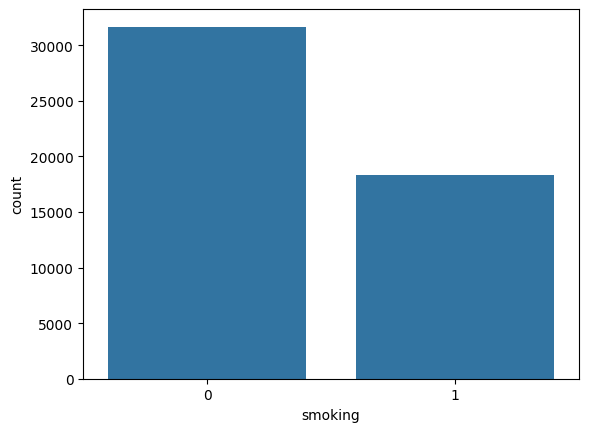

In [17]:
#Comiezo el analisis exploratorio de datos (EDA).
#Verifico si la variable objetivo esta desbalanceada, en este caso esta desbalanceada aproximadamente en 64% no fumadores y 36% si.
#
sns.countplot(data=df, x='smoking')
plt.show()

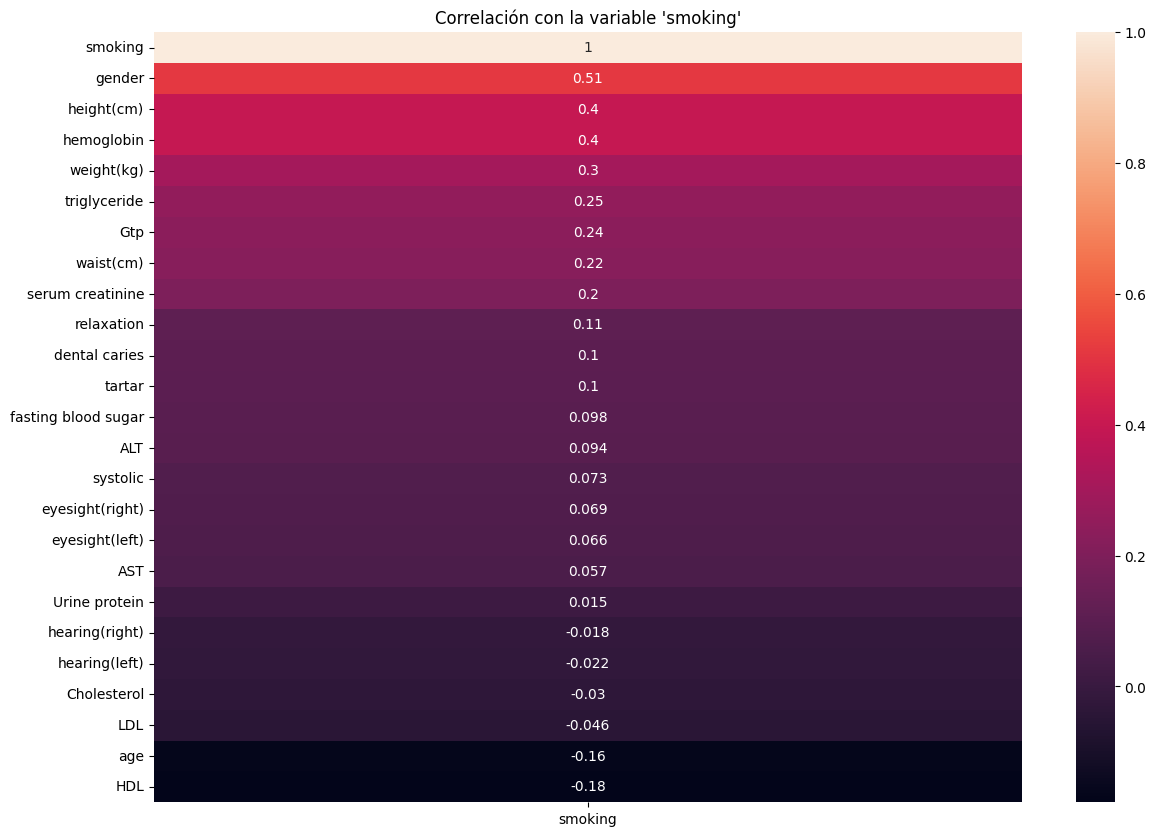

In [18]:
# Correlación con la variable objetivo smoking
# Con esto puedo ver que ninguna varialble esta fuertemente relacionada con la variable smoking.
# Por lo tanto necesito combinar multiples variables para hacer una buena predicción
plt.figure(figsize=(14,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr[['smoking']].sort_values(by='smoking', ascending=False), annot=True)
plt.title("Correlación con la variable 'smoking'")
plt.show()

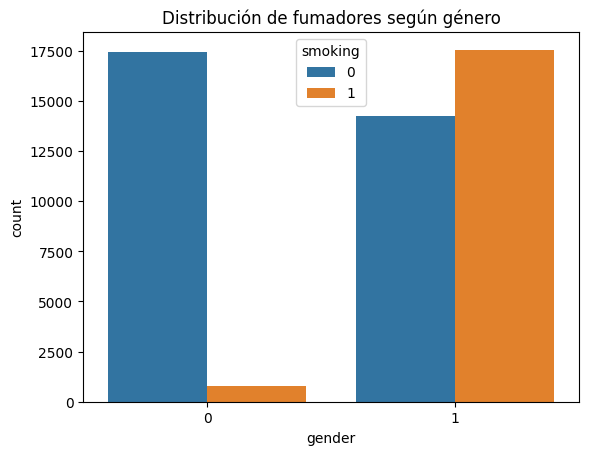

In [19]:
sns.countplot(x='gender', hue='smoking', data=df)
plt.title('Distribución de fumadores según género')
plt.show()

In [20]:
# Lista de columnas numéricas a evaluar
variables_numericas = [
    'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(right)','eyesight(left)',
    'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar',
    'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine',
    'AST', 'ALT', 'Gtp'
]

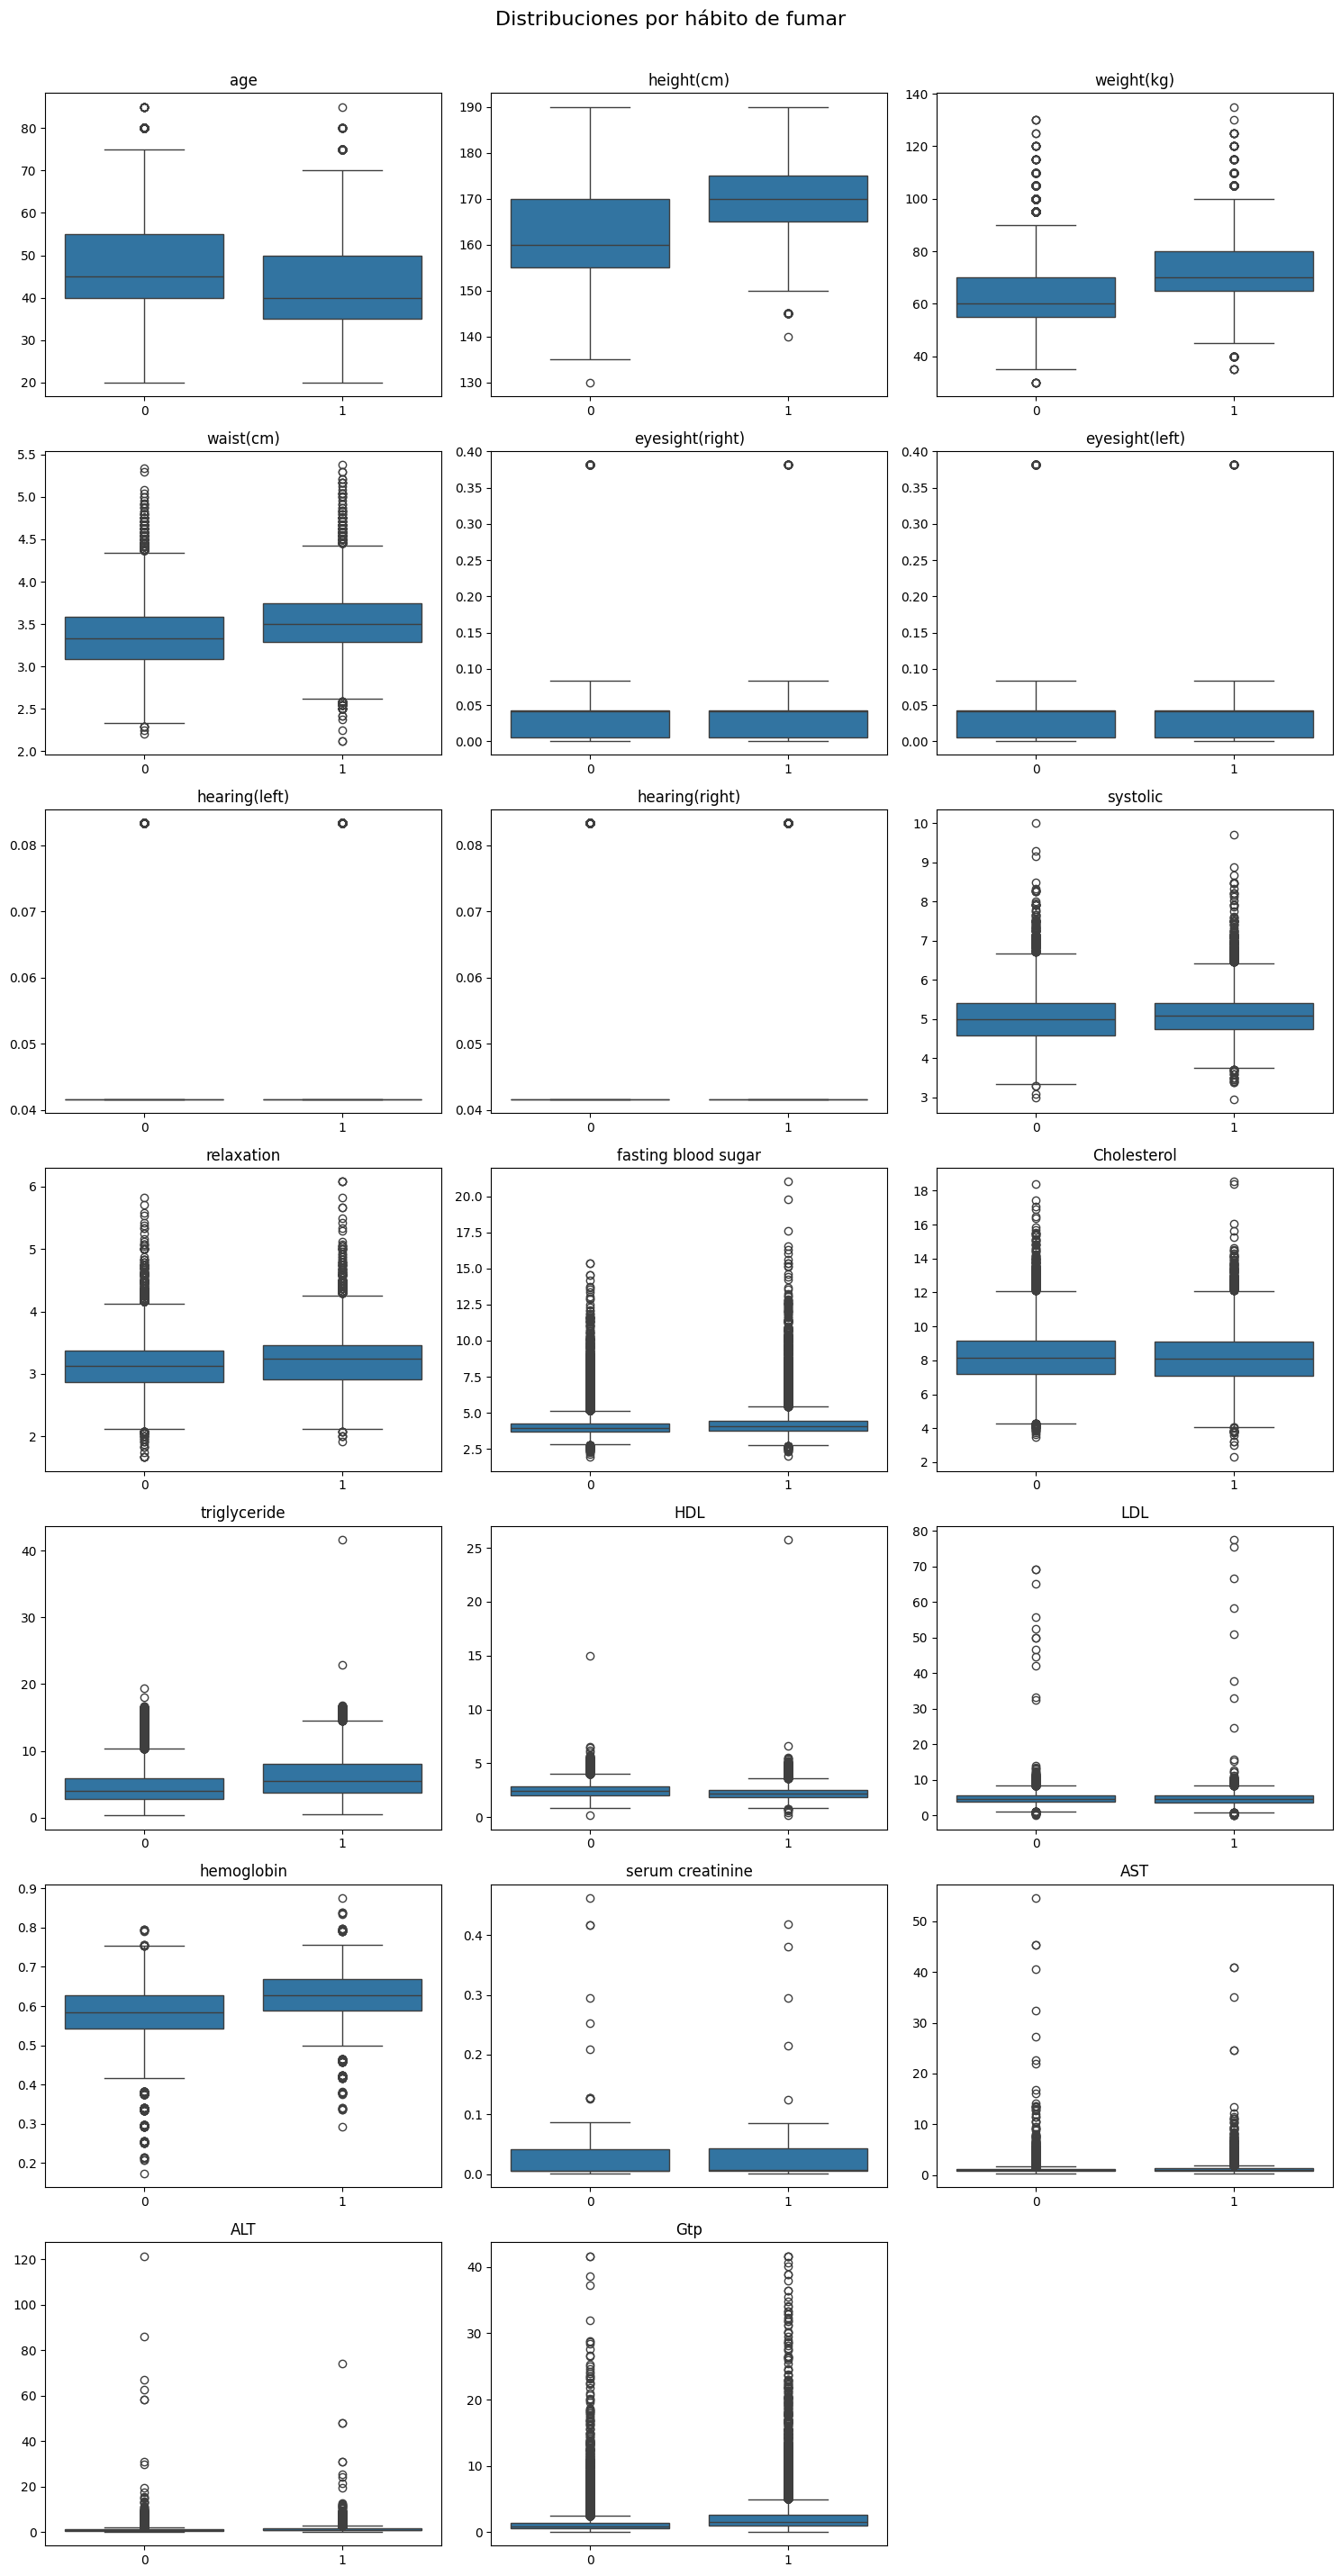

In [21]:
#Los resultados de los graficos muestran que las variables age, height y eyesight(left) y eyesight(right) tienen menos outlayers que el resto
#Se observa que, en promedio, los fumadores tienden a ser ligeramente más jóvenes que los no fumadores
#Tambien los fumadores suelen ser mas altos que los no fumadores
#Se puede ver tambien que eyesight(left) y eyesight(right), no son variables no tienen influencia directa a si fuman o no, son practicamente
#iguales para fumadores y no fumadores no inclina la balanza para ningun lado. Lo mismo pasa con hearhing(left) y hearing(right)
import seaborn as sns
import matplotlib.pyplot as plt

# Parámetros
num_vars = len(variables_numericas)
cols = 3
rows = (num_vars + cols - 1) // cols

plt.figure(figsize=(cols * 5, rows * 4))

for i, var in enumerate(variables_numericas):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x='smoking', y=var, data=df)
    plt.title(var)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle('Distribuciones por hábito de fumar', fontsize=16, y=1.02)
plt.show()


In [22]:
#Como las variables eyesight(left) y "eyesight(right) ambas están altamente correlacionadas o tienen valores similares
#voy a hacer un promedio entre las dos y dejar una sola variable para usar.
df["eyesight_avg"] = (df["eyesight(left)"] + df["eyesight(right)"]) / 2
df.drop(columns=['eyesight(left)', 'eyesight(right)'], inplace=True)

In [23]:
#Como las variables eyesight(left) y "eyesight(right) ambas están altamente correlacionadas o tienen valores similares
#voy a hacer un promedio entre las dos y dejar una sola variable para usar.
df["hearing_avg"] = (df["hearing(left)"] + df["hearing(right)"]) / 2
df.drop(columns=['hearing(left)', 'hearing(right)'], inplace=True)

In [24]:
variables_numericas = [
    'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight_avg',
    'hearing_avg', 'systolic', 'relaxation', 'fasting blood sugar',
    'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine',
    'AST', 'ALT', 'Gtp'
]

In [25]:
#Como todas las variables tienen un valor extremadamente bajo esto quiere decir que todas las variables son relevantes para utilizar en el modelo y ayudan a predecir.
from scipy.stats import mannwhitneyu

# Lista de columnas numéricas a evaluar


# Calculamos p-values
p_values = {}
for var in variables_numericas:
    grupo0 = df[df['smoking'] == 0][var]
    grupo1 = df[df['smoking'] == 1][var]
    stat, p = mannwhitneyu(grupo0, grupo1)
    p_values[var] = p

# Mostramos ordenado por p-value
resultados = pd.Series(p_values).sort_values()
print(resultados)


height(cm)              0.000000e+00
weight(kg)              0.000000e+00
waist(cm)               0.000000e+00
HDL                     0.000000e+00
hemoglobin              0.000000e+00
serum creatinine        0.000000e+00
triglyceride            0.000000e+00
ALT                     0.000000e+00
Gtp                     0.000000e+00
age                    1.568032e-297
relaxation             1.984804e-132
eyesight_avg           1.122456e-122
fasting blood sugar    3.548385e-118
AST                    5.830700e-111
systolic                7.040245e-67
LDL                     1.563084e-32
Cholesterol             4.815114e-10
hearing_avg             1.333544e-06
dtype: float64


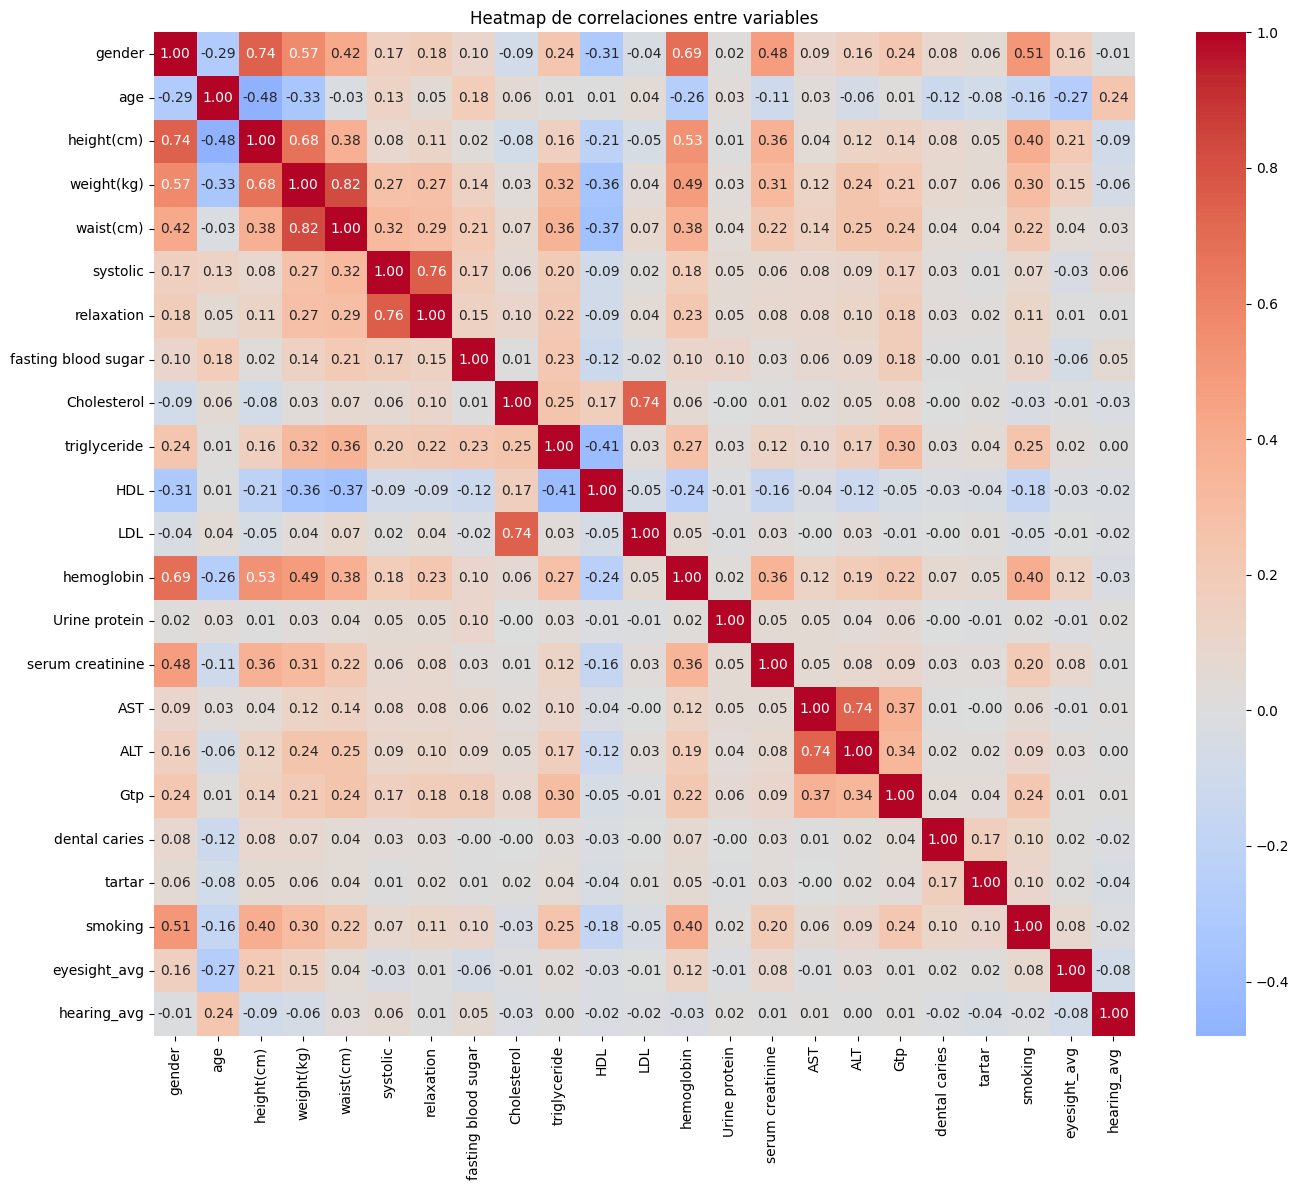

In [26]:
# Calculo la matriz de correlación entre todas las variable para ver cuales estan fuertemente correlacionadas
corr_matrix = df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Heatmap de correlaciones entre variables')
plt.tight_layout()
plt.show()

In [27]:
# Voy a sacar el indice de masa corporal para quitar weight y height, tambien quito waist ya que esta relacionada con BMI
df['BMI'] = df['weight(kg)'] / ((df['height(cm)'] / 100) ** 2)
df.drop(columns=['weight(kg)', 'height(cm)'], inplace=True)
# Calcular correlación entre BMI y waist(cm)
correlation = df[['BMI', 'waist(cm)']].corr().iloc[0, 1]

# Mostrar la correlación
print(f'La correlación entre BMI y waist(cm) es: {correlation:.2f}')

La correlación entre BMI y waist(cm) es: 0.82


In [28]:
df.drop(columns=['waist(cm)'], inplace=True)

In [29]:
# Dado que hay correlacion de 0.74 entre cholesterol y LDL voy a eliminar LDL, ya que tiene menos correlacion
# con la variable objetivo como se ve en el grafico de Correlación con la variable 'smoking'
df.drop(columns=['LDL'], inplace=True)

In [30]:
# AST y ALT suelen subir juntas cuando hay daño hepatico, voy a hacer un promedio entre las dos. ya que tienen fuerte correlacion 0.74
df['AST_ALT_mean'] = (df['AST'] + df['ALT']) / 2
df.drop(columns=['AST', 'ALT'], inplace=True)

In [31]:
df

,gender,age,systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,Gtp,dental caries,tartar,smoking,eyesight_avg,hearing_avg,BMI,AST_ALT_mean
0,0,40,4.750000,3.041667,3.916667,8.958333,3.416667,3.041667,0.506250,0.041667,0.004861,1.125000,0,1,0,0.042361,0.041667,24.973985,0.770833
1,0,40,4.958333,2.916667,5.416667,8.000000,4.791667,1.750000,0.504861,0.041667,0.004167,0.750000,0,1,0,0.004861,0.041667,23.437500,0.854167
2,1,55,5.750000,3.583333,3.708333,10.083333,7.583333,2.291667,0.630556,0.041667,0.041667,0.916667,0,0,1,0.005556,0.041667,20.761246,0.770833
3,1,40,4.166667,2.500000,4.000000,13.416667,10.583333,1.875000,0.588194,0.041667,0.041667,0.750000,0,1,0,0.045139,0.041667,25.711662,0.937500
4,0,40,5.000000,3.083333,3.333333,7.666667,3.083333,2.583333,0.503472,0.041667,0.004167,0.916667,0,0,0,0.041667,0.041667,24.973985,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,50,5.083333,3.000000,4.125000,5.916667,1.291667,2.625000,0.547917,0.041667,0.041667,0.916667,0,1,1,0.005208,0.041667,21.484375,0.770833
49996,1,30,4.666667,3.208333,3.708333,6.666667,6.000000,2.250000,0.629167,0.041667,0.006250,0.750000,1,1,1,0.043403,0.041667,24.221453,1.145833
49997,1,20,5.208333,3.125000,3.958333,6.541667,11.916667,1.958333,0.670833,0.041667,0.005556,2.916667,0,1,1,0.045139,0.041667,23.875115,1.458333
49998,0,60,4.916667,3.250000,3.916667,7.875000,5.750000,2.583333,0.584028,0.041667,0.004861,1.041667,1,1,0,0.002778,0.041667,17.578125,0.729167


In [32]:
X_rf = df.drop(columns=['smoking'])
y_rf = df['smoking']

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [34]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)


In [37]:
#PRUEBA RANDOM FOREST BASICO
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model_rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [38]:
y_train_pred_rf = model_rf.predict(X_train_rf)
y_test_pred_rf = model_rf.predict(X_test_rf)

In [40]:
# Este modelo esta overfiteando. Aunque en test no tiene malos resultados, el rendimiento perfecto en entrenamiento indica que el modelo
#memoriza los datos y no aprende patrones reales.
# === EVALUACIÓN EN TRAIN ===

print("=== EVALUACIÓN EN TRAIN (Random Forest Basico) ===")
print("Accuracy:", accuracy_score(y_train_rf, y_train_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_train_rf, y_train_pred_rf))
print("\nClassification Report:\n", classification_report(y_train_rf, y_train_pred_rf))

# === EVALUACIÓN EN TEST ===

print("\n=== EVALUACIÓN EN TEST (Random Forest Basico) ===")
print("Accuracy:", accuracy_score(y_test_rf, y_test_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_rf, y_test_pred_rf))
print("\nClassification Report:\n", classification_report(y_test_rf, y_test_pred_rf))

=== EVALUACIÓN EN TRAIN (Random Forest Basico) ===
Accuracy: 1.0

Confusion Matrix:
 [[25345     0]
 [    0 14655]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25345
           1       1.00      1.00      1.00     14655

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000


=== EVALUACIÓN EN TEST (Random Forest Basico) ===
Accuracy: 0.792

Confusion Matrix:
 [[5322 1004]
 [1076 2598]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      6326
           1       0.72      0.71      0.71      3674

    accuracy                           0.79     10000
   macro avg       0.78      0.77      0.78     10000
weighted avg       0.79      0.79      0.79     10000



In [342]:
#PRIMERA PRUEBA CON RANDOMFOREST
model_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,             # Limita la profundidad de los árboles, previene que memorice los datos.
    min_samples_split=10,     # Mínimo de muestras para dividir un nodo.
    min_samples_leaf=5,       # Mínimo de muestras por hoja reduce el ruido
    random_state=42,
    class_weight='balanced'
)

model_rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [343]:
y_train_pred_rf = model_rf.predict(X_train_rf)
y_test_pred_rf = model_rf.predict(X_test_rf)

In [344]:
# === EVALUACIÓN EN TRAIN ===

print("=== EVALUACIÓN EN TRAIN (Random Forest) ===")
print("Accuracy:", accuracy_score(y_train_rf, y_train_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_train_rf, y_train_pred_rf))
print("\nClassification Report:\n", classification_report(y_train_rf, y_train_pred_rf))

# === EVALUACIÓN EN TEST ===

print("\n=== EVALUACIÓN EN TEST (Random Forest) ===")
print("Accuracy:", accuracy_score(y_test_rf, y_test_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_rf, y_test_pred_rf))
print("\nClassification Report:\n", classification_report(y_test_rf, y_test_pred_rf))

=== EVALUACIÓN EN TRAIN (Random Forest) ===
Accuracy: 0.762325

Confusion Matrix:
 [[16681  8664]
 [  843 13812]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.66      0.78     25345
           1       0.61      0.94      0.74     14655

    accuracy                           0.76     40000
   macro avg       0.78      0.80      0.76     40000
weighted avg       0.83      0.76      0.77     40000


=== EVALUACIÓN EN TEST (Random Forest) ===
Accuracy: 0.7328

Confusion Matrix:
 [[3991 2335]
 [ 337 3337]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.63      0.75      6326
           1       0.59      0.91      0.71      3674

    accuracy                           0.73     10000
   macro avg       0.76      0.77      0.73     10000
weighted avg       0.80      0.73      0.74     10000



In [345]:
# Variable objetivo
y = df['smoking']

# Features (excluyendo la variable objetivo)
X = df.drop(columns=['smoking'])

In [346]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(
    X, y, id, test_size=0.2, random_state=seed, stratify=y
)


In [347]:
#SEGUNDA PRUEBA CON XGBOOST
from xgboost import XGBClassifier

model = XGBClassifier(
    random_state=seed,
    eval_metric='logloss'
)

model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [348]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# PREDICCIONES
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# EVALUACIÓN EN TRAIN
print("\n=== EVALUACIÓN EN TRAIN (XGBOOST)===")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print("Classification Report:\n", classification_report(y_train, y_pred_train))

# EVALUACIÓN EN TEST
print("=== EVALUACIÓN EN TEST (XGBOOST) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))




=== EVALUACIÓN EN TRAIN (XGBOOST)===
Accuracy: 0.8598
Confusion Matrix:
 [[22295  3042]
 [ 2566 12097]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89     25337
           1       0.80      0.83      0.81     14663

    accuracy                           0.86     40000
   macro avg       0.85      0.85      0.85     40000
weighted avg       0.86      0.86      0.86     40000

=== EVALUACIÓN EN TEST (XGBOOST) ===
Accuracy: 0.7692
Confusion Matrix:
 [[5100 1234]
 [1074 2592]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      6334
           1       0.68      0.71      0.69      3666

    accuracy                           0.77     10000
   macro avg       0.75      0.76      0.75     10000
weighted avg       0.77      0.77      0.77     10000



In [349]:
predicciones = pd.DataFrame({
    'ID': id_test.values,
    'real': y_test.values,
    'predicho': y_pred_test
})

print(predicciones.head())

      ID  real  predicho
0  27911     0         1
1  22933     1         1
2  22357     0         0
3   7084     0         0
4  14893     0         1


In [350]:
# voy a usar el hiperparametro scale_pos_weight, entonces lo calculo de la siguiente manera:
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos
print(f"Negativos: {neg}, Positivos: {pos}, Scale_pos_weight: {scale_pos_weight:.2f}")

Negativos: 25337, Positivos: 14663, Scale_pos_weight: 1.73


In [351]:
#TERCERA PRUEBA CON XGBOOST CON BALANCEO
model = XGBClassifier(
    random_state=seed,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight  # Balanceo el modelo que scale_pos_weight
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [352]:
# Nuevas predicciones
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# EVALUACIÓN EN TRAIN
print("\n=== EVALUACIÓN EN TRAIN  (XGBoost scale_pos_weight) ===")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print("Classification Report:\n", classification_report(y_train, y_pred_train))

# EVALUACIÓN EN TEST
print("=== EVALUACIÓN EN TEST (XGBoost scale_pos_weight) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))


=== EVALUACIÓN EN TRAIN  (XGBoost scale_pos_weight) ===
Accuracy: 0.832725
Confusion Matrix:
 [[19722  5615]
 [ 1076 13587]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.78      0.85     25337
           1       0.71      0.93      0.80     14663

    accuracy                           0.83     40000
   macro avg       0.83      0.85      0.83     40000
weighted avg       0.86      0.83      0.84     40000

=== EVALUACIÓN EN TEST (XGBoost scale_pos_weight) ===
Accuracy: 0.7589
Confusion Matrix:
 [[4495 1839]
 [ 572 3094]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.71      0.79      6334
           1       0.63      0.84      0.72      3666

    accuracy                           0.76     10000
   macro avg       0.76      0.78      0.75     10000
weighted avg       0.79      0.76      0.76     10000



In [353]:
predicciones = pd.DataFrame({
    'ID': id_test.values,
    'real': y_test.values,
    'predicho': y_pred_test
})

print(predicciones.head())


      ID  real  predicho
0  27911     0         0
1  22933     1         1
2  22357     0         0
3   7084     0         0
4  14893     0         1


In [355]:
url_nuevos_datos = "https://docs.google.com/uc?export=download&id=1dpTMd0R0-YJ6psx8egWNR-IL5g6QPraL"

df_nuevos = pd.read_excel(url_nuevos_datos, engine='openpyxl')
df_nuevos.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,27358,M,25,160,65,3.420139,0.045139,0.002778,0.041667,0.041667,...,3.041667,0.631250,0.041667,0.006250,0.750000,0.708333,0.708333,Y,0,Y
1,27364,M,30,180,80,3.458333,0.043056,0.006250,0.041667,0.041667,...,4.208333,0.587500,0.041667,0.041667,0.791667,1.125000,1.333333,Y,0,N
2,27368,M,55,165,60,3.416667,0.004861,0.005556,0.041667,0.041667,...,2.041667,0.625694,0.041667,0.006250,1.083333,1.291667,2.000000,Y,1,Y
3,27378,M,20,175,75,3.625000,0.045139,0.045139,0.041667,0.041667,...,3.708333,0.627083,0.041667,0.043750,0.833333,0.583333,0.458333,Y,0,N
4,27381,M,25,165,80,3.791667,0.043056,0.041667,0.041667,0.041667,...,6.625000,0.670833,0.041667,0.041667,1.250000,1.625000,1.958333,Y,1,Y


In [356]:
#Vuelvo a limpiar los datos para el nuevo dataset de entrega:
#Separo ID
id_nuevos = df_nuevos['ID'].copy()
df_nuevos = df_nuevos.drop(columns=['ID'])

In [357]:
df_nuevos["eyesight_avg"] = (df_nuevos["eyesight(left)"] + df_nuevos["eyesight(right)"]) / 2

In [358]:
df_nuevos["hearing_avg"] = (df_nuevos["hearing(left)"] + df_nuevos["hearing(right)"]) / 2

In [359]:
#Cambio variables categoricas a numeros
df_nuevos['gender'] = df_nuevos['gender'].map({'F':0, 'M':1})
df_nuevos['tartar'] = df_nuevos['tartar'].map({'Y':1, 'N':0})



In [360]:
#Calculo BMI
df_nuevos['BMI'] = df_nuevos['weight(kg)'] / ((df_nuevos['height(cm)'] / 100) ** 2)

#Saco promedio de AST y ALT
df_nuevos['AST_ALT_mean'] = (df_nuevos['AST'] + df_nuevos['ALT']) / 2



In [361]:
#Elimino las columnas recalculadas.
df_nuevos.drop(columns=['weight(kg)', 'height(cm)', 'waist(cm)', 'LDL', 'AST', 'ALT', 'oral','eyesight(left)', 'eyesight(right)','hearing(left)', 'hearing(right)'], errors='ignore', inplace=True)

In [362]:
#ELEGÍ EL MODELO DE RANDOMFOREST
# Hago la prediccion, no separo en train y test ya que en model esta todo precargado. Solo hago la predicción
X_nuevos = df_nuevos.copy()
y_pred_nuevos = model_rf.predict(X_nuevos)

# Agrego la columna Smoking con la predicción
df_nuevos['Smoking'] = y_pred_nuevos

# Guardo el archivo final con las predicciones en la columna smoking
df_nuevos.to_excel("predicciones_smoking_entrega.xlsx", index=False)